In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid')
  
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')


from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score

In [26]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.shape

(1014, 7)

In [27]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [28]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [29]:
#Checking for any null values, for which we don't have any with this data.
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [30]:
#There doesn't seem to be any abnormalities from glancing the common statistics here.
#The min and max heart rate is 7 and 90 respectively.

df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [32]:
df['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

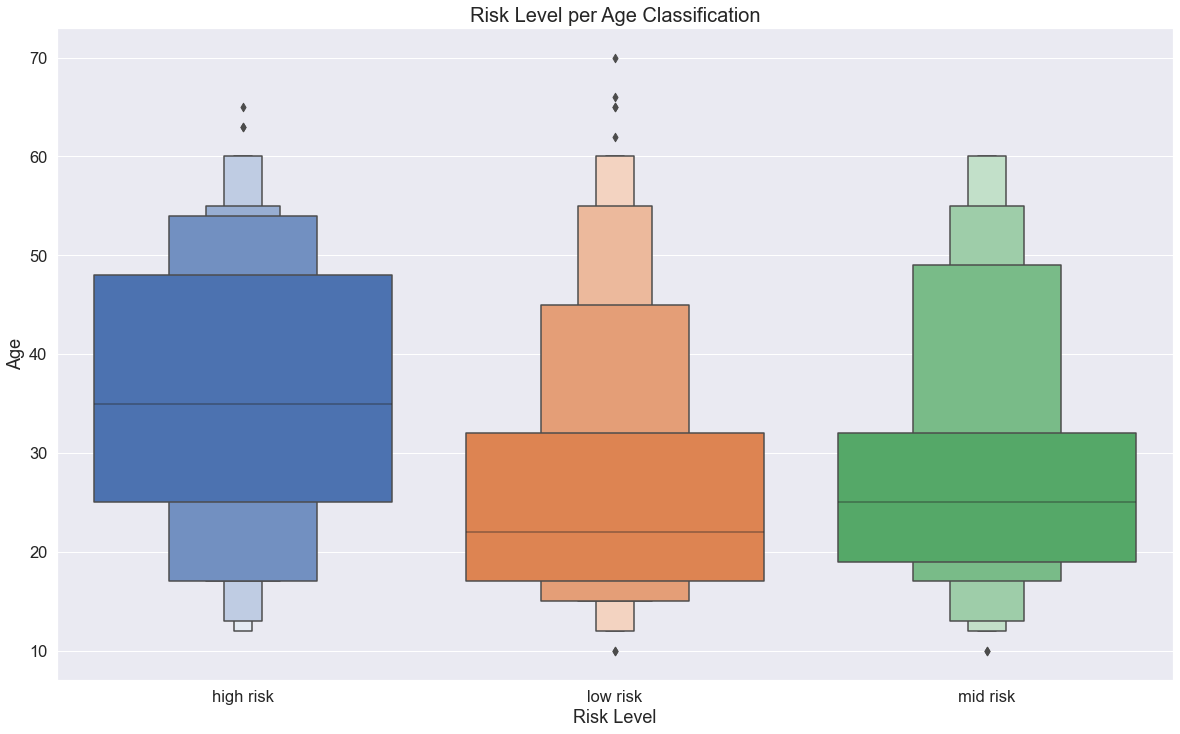

In [33]:
# To start my EDA, i can make some boxplots of the different attributes as i have split it by the Risk Level classification target.

sns.set(font_scale=1.5)
plt.figure(figsize=(20,12))
g = sns.boxenplot(x='RiskLevel', y='Age', data=df,
             saturation=1.5)
g.set_xlabel('Risk Level')
g.set_ylabel('Age')
g.set_title('Risk Level per Age Classification', fontsize=20)
plt.show()

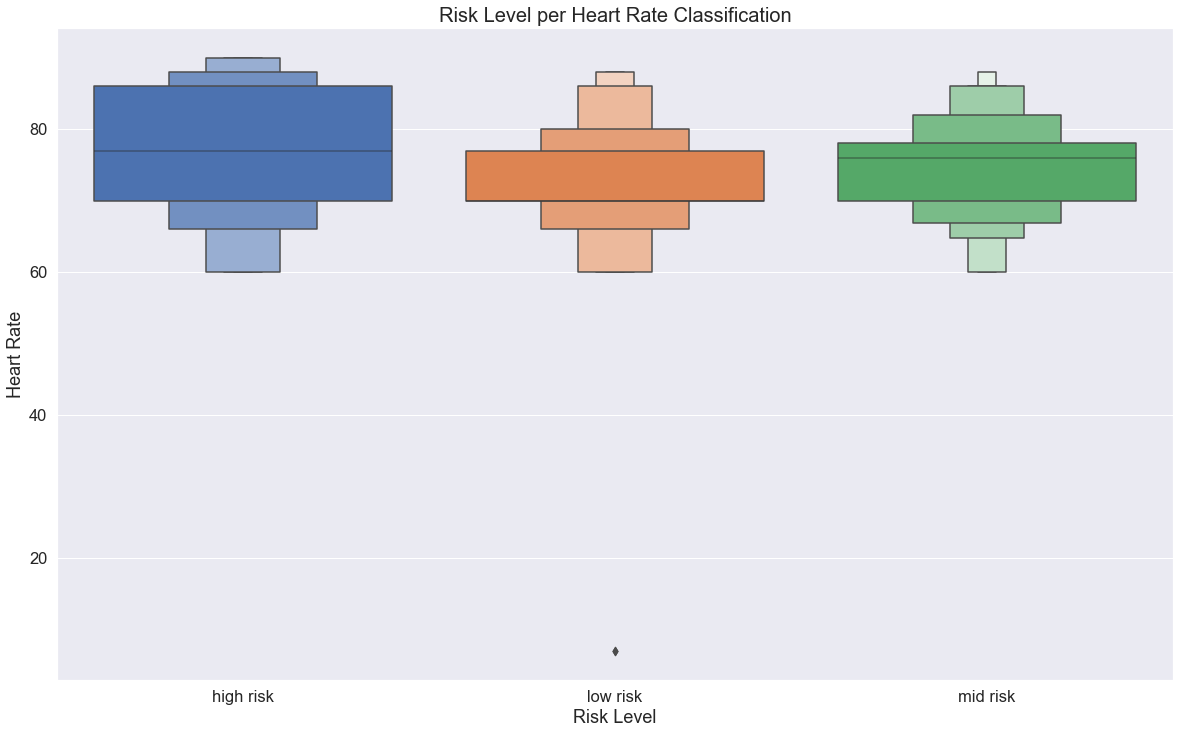

In [34]:
# Next i'll try Heart Rate and see if there are any trends there.

sns.set(font_scale=1.5)
plt.figure(figsize=(20,12))
g = sns.boxenplot(x='RiskLevel', y='HeartRate', data=df,
             saturation=1.5)
g.set_xlabel('Risk Level')
g.set_ylabel('Heart Rate')
g.set_title('Risk Level per Heart Rate Classification', fontsize=20)
plt.show()

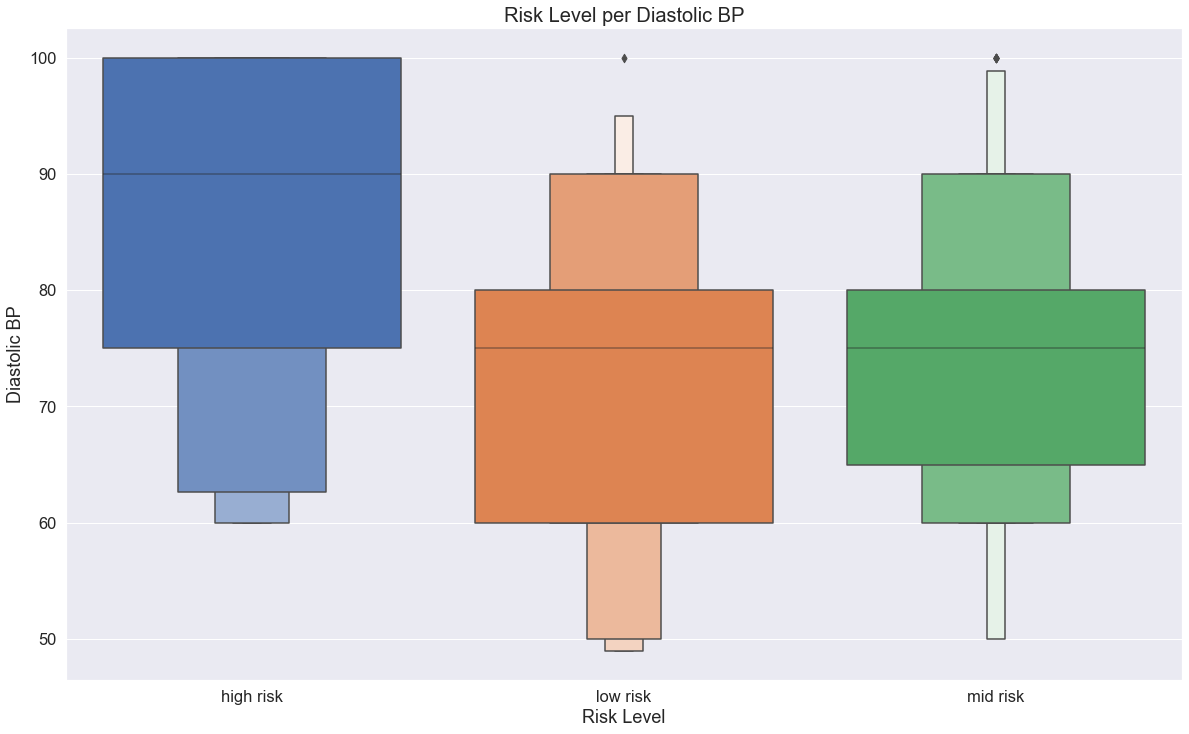

In [35]:
# Next i'll try DiastolicBP and see if there are any further trends there.

sns.set(font_scale=1.5)
plt.figure(figsize=(20,12))
g = sns.boxenplot(x='RiskLevel', y='DiastolicBP', data=df,
             saturation=1.5)
g.set_xlabel('Risk Level')
g.set_ylabel('Diastolic BP')
g.set_title('Risk Level per Diastolic BP', fontsize=20)
plt.show()

In [36]:
#There doesn't seem to be a lot of variability among Diastolic Bp. There are more higher values for normal records.' \ Now, I'll create a pair plot to look at distributions across these different attributes provided.**

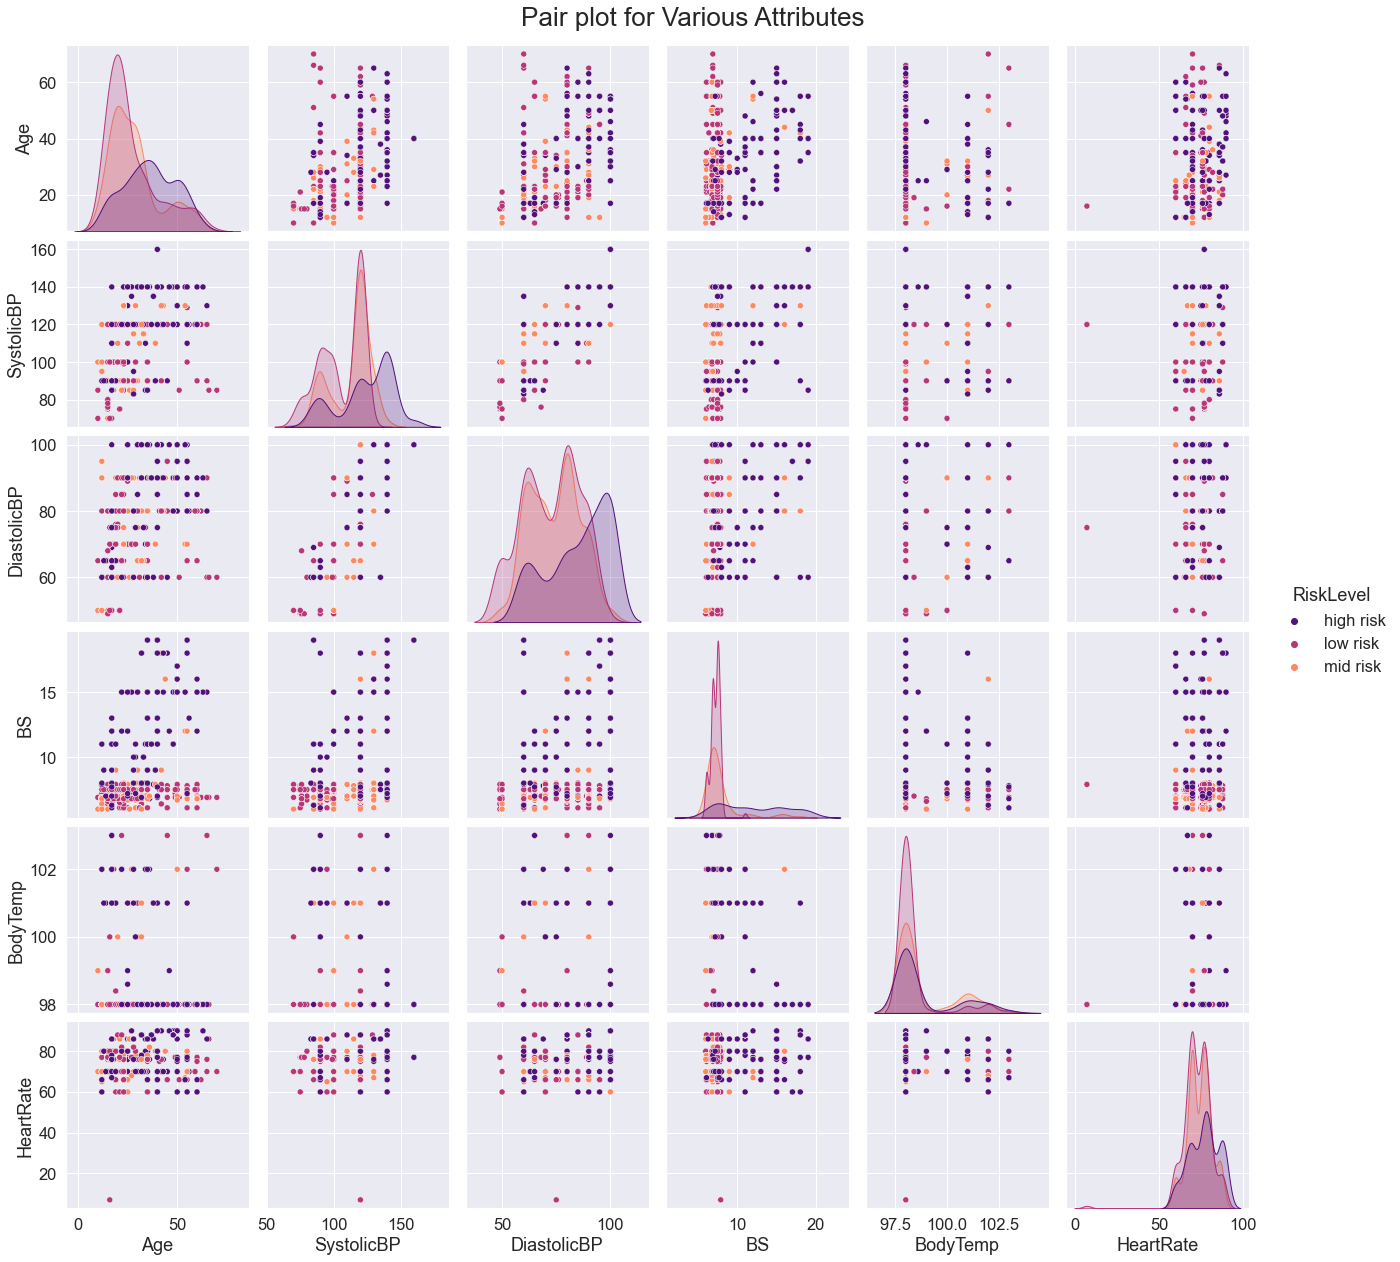

In [37]:
pair_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']

g = sns.pairplot(df[pair_cols], hue="RiskLevel", height=3, aspect=1, palette='magma')
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Pair plot for Various Attributes', fontsize=26)
plt.show()

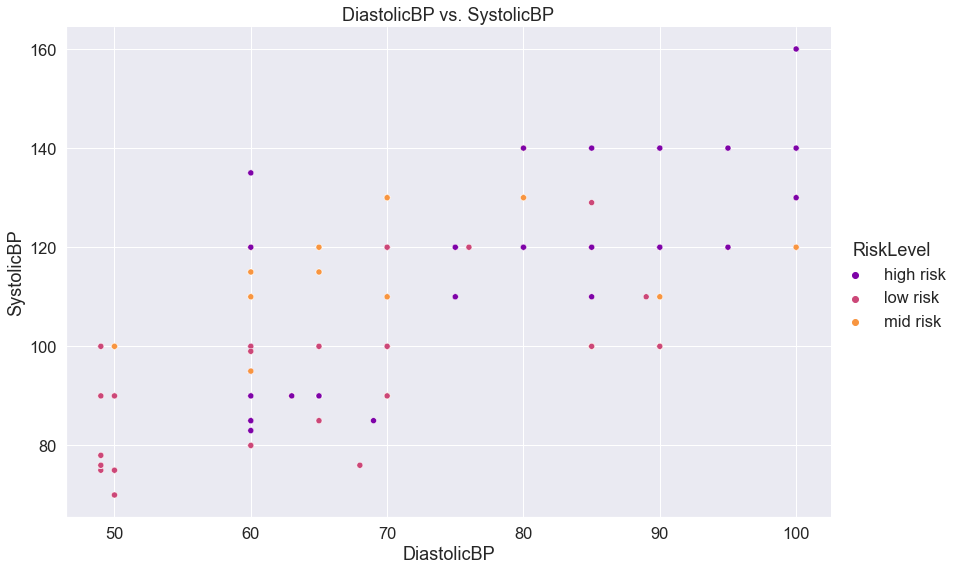

In [38]:
g = sns.relplot(
    data=df,
    x="DiastolicBP", y="SystolicBP",
    hue="RiskLevel", height=8, aspect=1.5, palette='plasma')
g.set(title='DiastolicBP vs. SystolicBP')
plt.show()

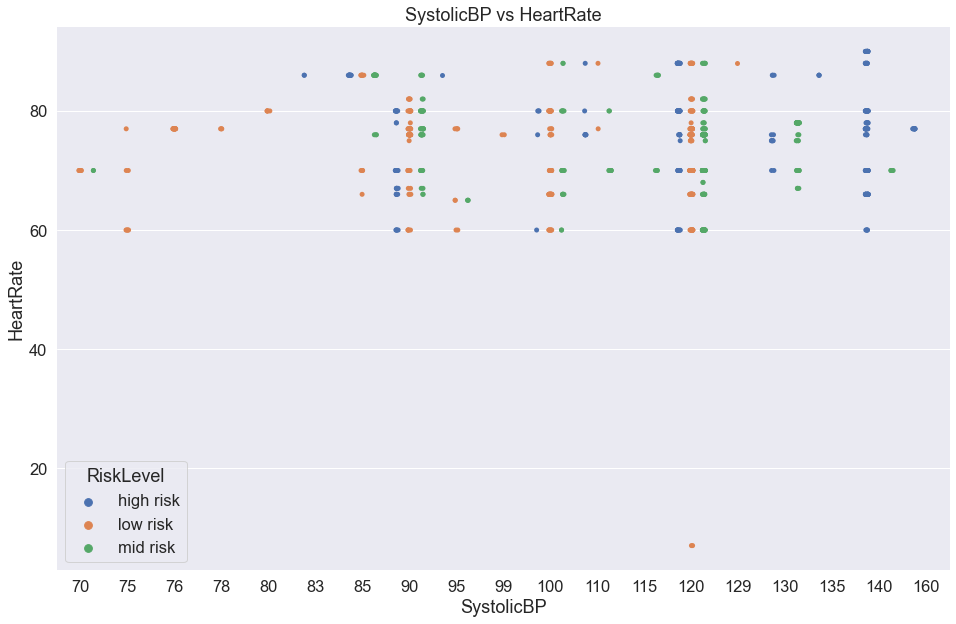

In [39]:
f, ax = plt.subplots(figsize=(16,10))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="SystolicBP", y="HeartRate", hue="RiskLevel",
              data=df, dodge=True)
ax.set_title('SystolicBP vs HeartRate')
plt.show()

Text(0.5, 0.98, 'Distributions of Maternal Health Values')

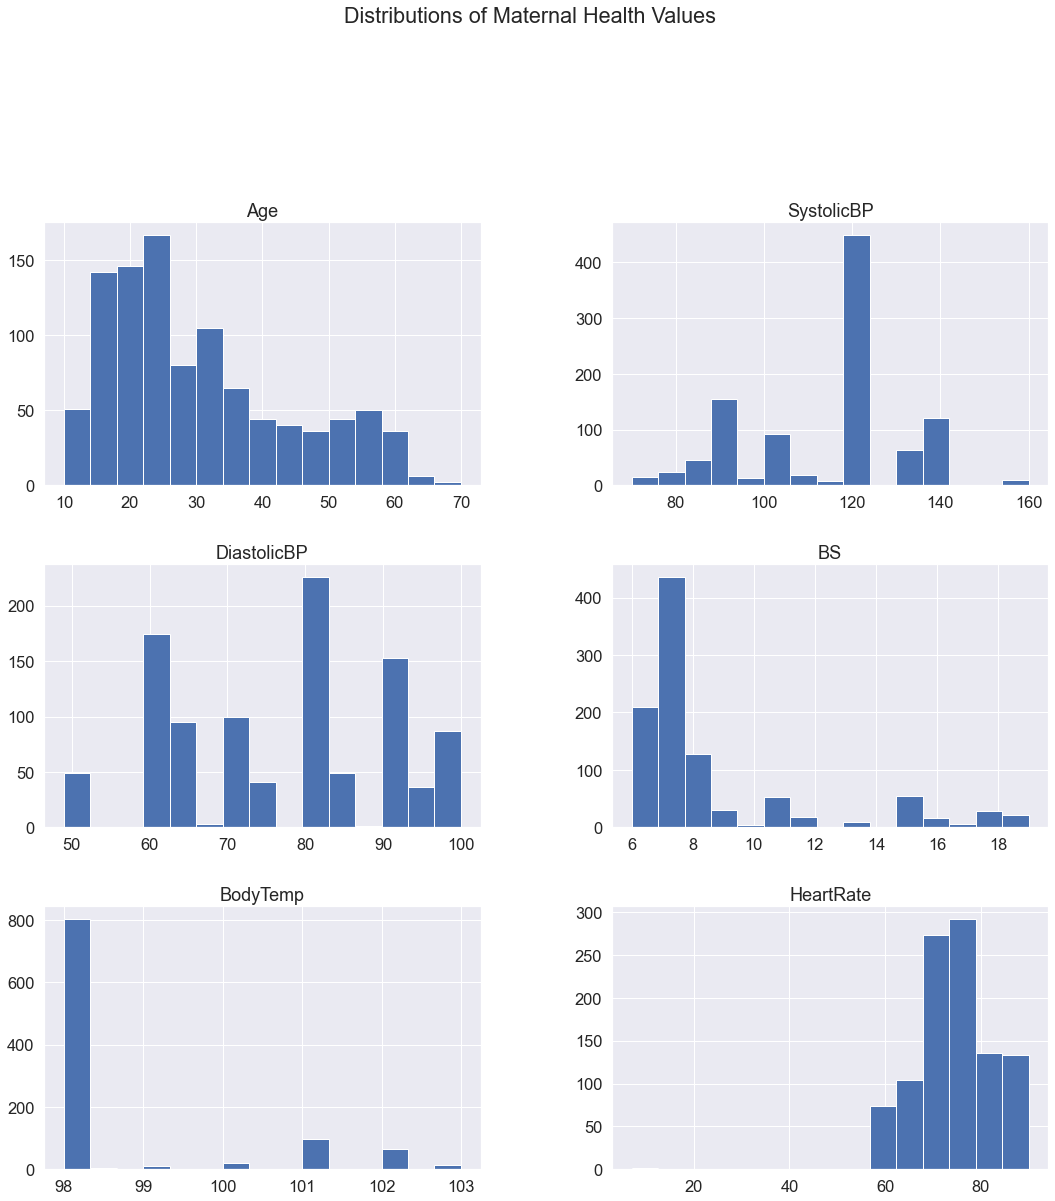

In [40]:
hist_cols = df.columns.tolist()[0:6]

df[hist_cols].hist(bins=15, figsize=(18, 30), layout=(5, 2));
plt.suptitle('Distributions of Maternal Health Values')

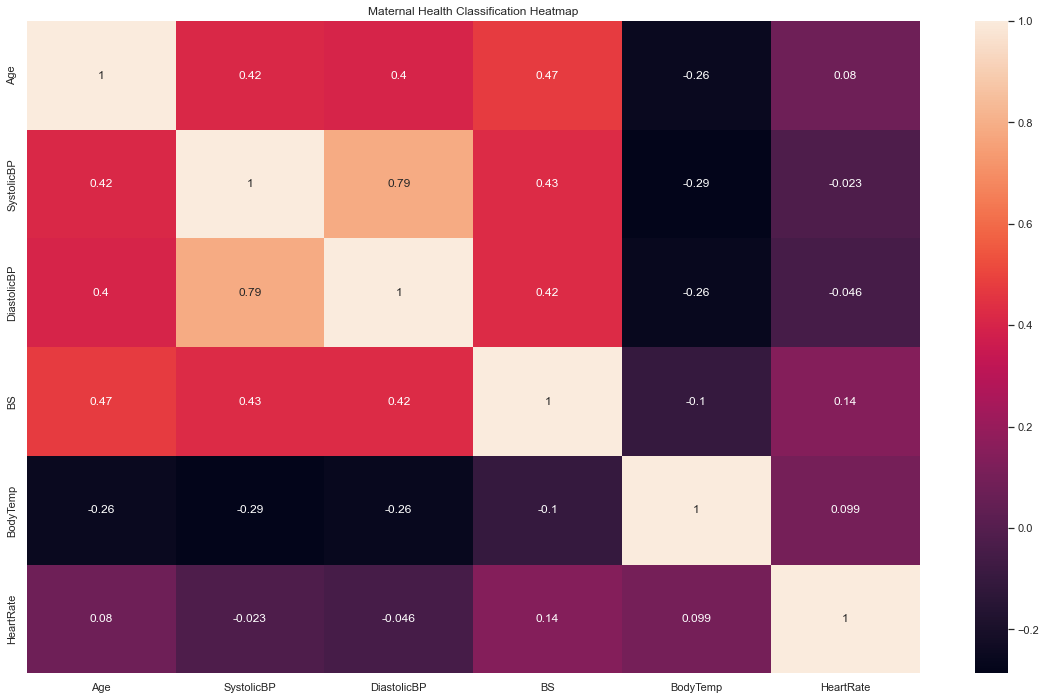

In [41]:
# Let's plot a heatmap to pick up any correlations.
sns.set(font_scale=1.0)
plt.figure(figsize=(20, 12))
plt.title('Maternal Health Classification Heatmap', fontsize=12)
heatmap = sns.heatmap(df.corr(), annot=True)

In [42]:
hist_cols.append('RiskLevel')

In [43]:
new_hist_cols = hist_cols[-6:]

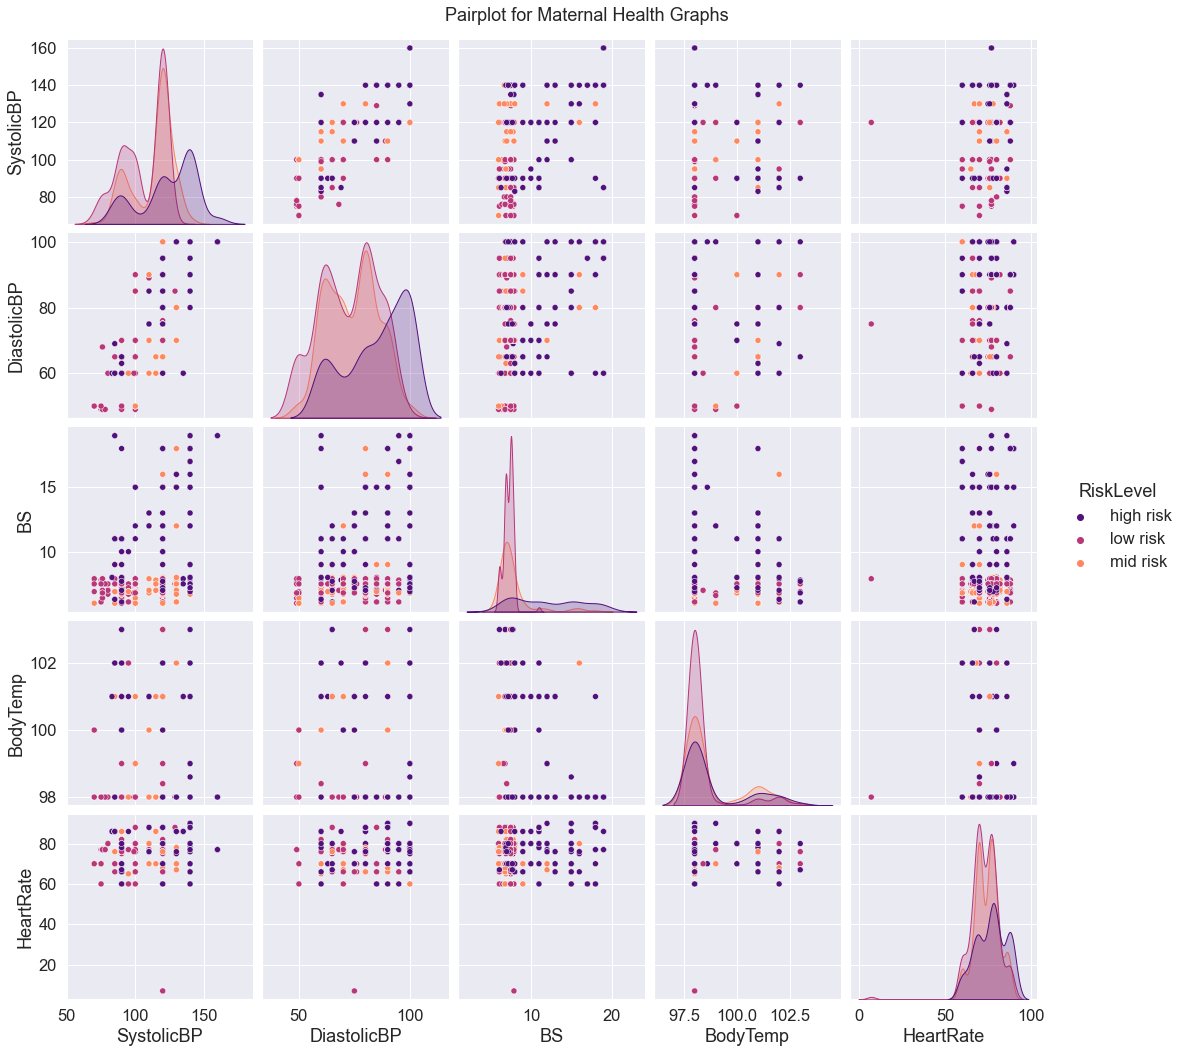

In [44]:
sns.set(font_scale=1.5)
g = sns.pairplot(df[new_hist_cols], hue="RiskLevel", height=3, aspect=1.0, palette='magma')
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Pairplot for Maternal Health Graphs', fontsize=18)
plt.show()

In [96]:
import plotly.graph_objects as go
from plotly.colors import n_colors

data = (np.linspace(1, 2, 6)[:, np.newaxis] * np.random.randn(6, 100) +
            (np.arange(6) + 2 * np.random.random(6))[:, np.newaxis])

colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', 12, colortype='rgb')

fig = go.Figure()
for data_line, color in zip(data, colors):
    fig.add_trace(go.Violin(x=data_line, line_color=color))

fig.update_traces(orientation='h', side='positive', width=3, points=False)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)
fig.show()

In [45]:
for col in df.columns:
  fig = px.violin(df, y=col, points='all', color="RiskLevel", title="Violin Plot of column {0}".format(col))
  fig.show()

In [97]:
for col in df.columns:
  fig = px.violin(df, y=col, points='all', title="Violin Plot of column {0}".format(col))
  fig.show()

In [47]:
# Lets check for Outlier detections

iqr_cols = df.columns.tolist()[:-1] #all columns except the target

new_df = df.copy()

In [48]:
for col in iqr_cols:
    p_25 = new_df[col].quantile(0.25)
    p_75 = new_df[col].quantile(0.75)
    iqr = p_75 - p_25

    upper_limit = p_75 + (1.5 * iqr)
    lower_limit = p_25 + (1.5 * iqr)

    new_df.loc[new_df[col] > upper_limit, col] = upper_limit
    new_df.loc[new_df[col] < lower_limit, col] = lower_limit

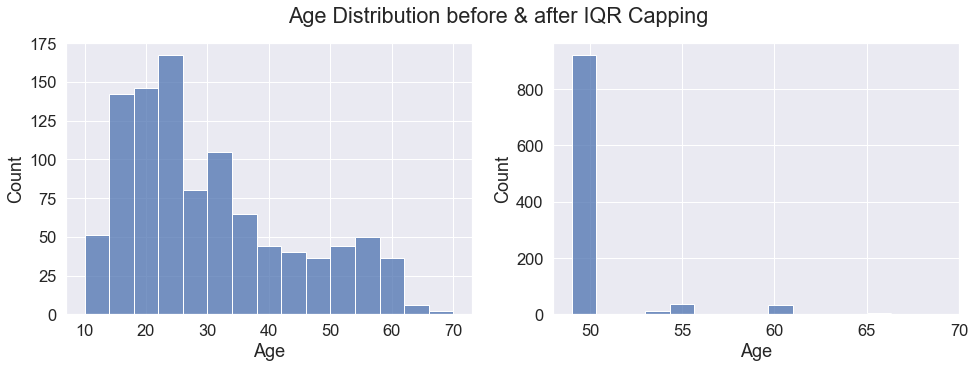

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
plt.suptitle('Age Distribution before & after IQR Capping')
sns.histplot(x='Age', data=df, bins=15, ax=axes[0])
sns.histplot(x='Age', data=new_df, bins=15, ax=axes[1])
plt.show()

In [93]:
#Looking at the distribution of the Target Variable
fig = px.pie(df, values=df['RiskLevel'].value_counts(), names=df['RiskLevel'].unique(), title=' Risk Level Distribution')
fig.show()

In [51]:
X = df.loc[:, :'HeartRate']
y = df.loc[:, 'RiskLevel']

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

comp_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=comp_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.431977,-1.418768,-0.302615,-0.578835,-1.516407,0.449602
1,2.122005,0.392294,0.498170,0.083775,-0.617824,0.360742
2,-1.285461,-1.089671,0.084228,0.278076,0.254716,-0.562205
3,0.996259,1.055355,0.269439,-0.770026,0.404038,0.599962
4,-0.460422,0.152627,-0.916246,-0.007447,0.636881,1.060080


In [54]:
loadings = pd.DataFrame(pca.components_.T, columns = comp_names, index=X.columns)

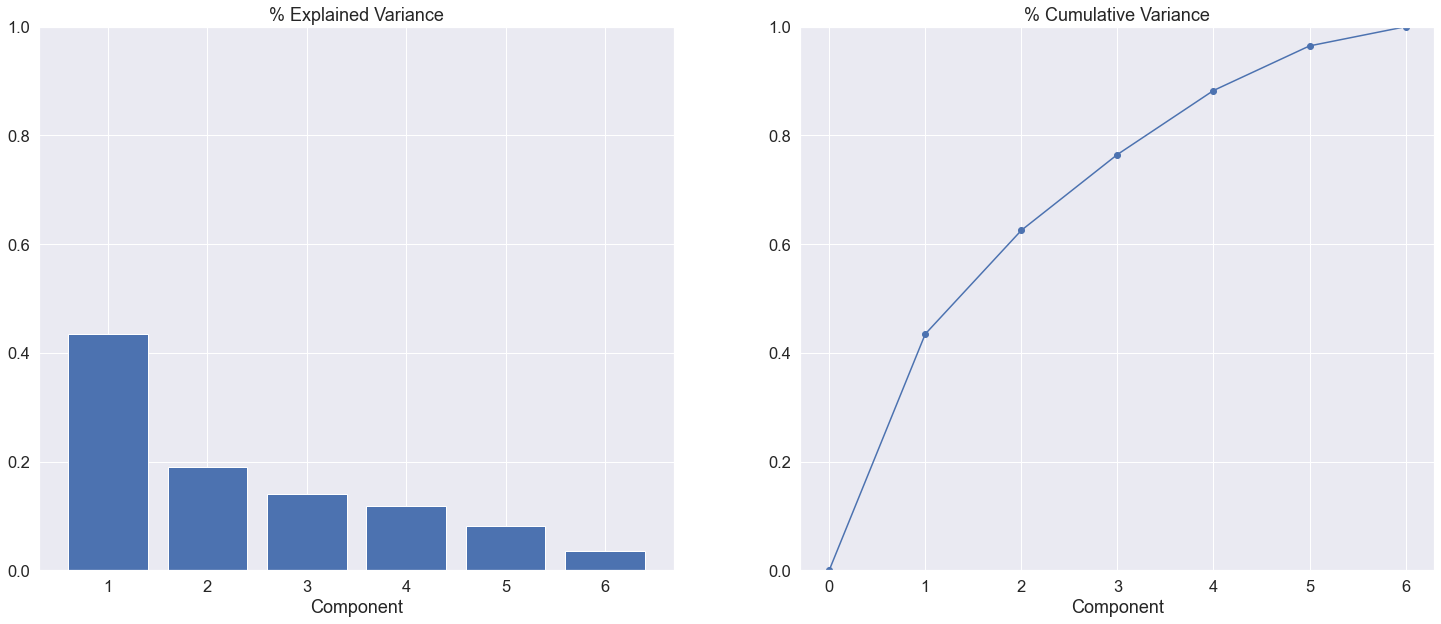

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(25,10))
n = pca.n_components_
grid = np.arange(1, n + 1)

evr = pca.explained_variance_ratio_
axs[0].bar(grid, evr)
axs[0].set(
    xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
)

cv = np.cumsum(evr)
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(
    xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
)

plt.show()

In [56]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

comp_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=comp_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.431977,-1.418768,-0.302615,-0.578835,-1.516407,0.449602
1,2.122005,0.392294,0.498170,0.083775,-0.617824,0.360742
2,-1.285461,-1.089671,0.084228,0.278076,0.254716,-0.562205
3,0.996259,1.055355,0.269439,-0.770026,0.404038,0.599962
4,-0.460422,0.152627,-0.916246,-0.007447,0.636881,1.060080


In [57]:
loadings = pd.DataFrame(pca.components_.T, columns = comp_names, index=X.columns)

In [58]:
data_pca = pd.DataFrame(data = pca.components_,
                           columns = X.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6'])
data_pca

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Component 1,0.436075,0.529602,0.522568,0.425529,-0.273509,0.020040
Component 2,-0.172902,0.112900,0.123042,-0.352890,-0.429320,-0.795847
Component 3,-0.240439,0.241584,0.299096,0.115351,0.809344,-0.354999
Component 4,0.555093,-0.363373,-0.354416,0.425424,0.130541,-0.485999
Component 5,0.643211,0.093867,0.078101,-0.707099,0.260671,0.058569
Component 6,-0.016858,0.712434,-0.700439,0.010631,0.029144,-0.023998


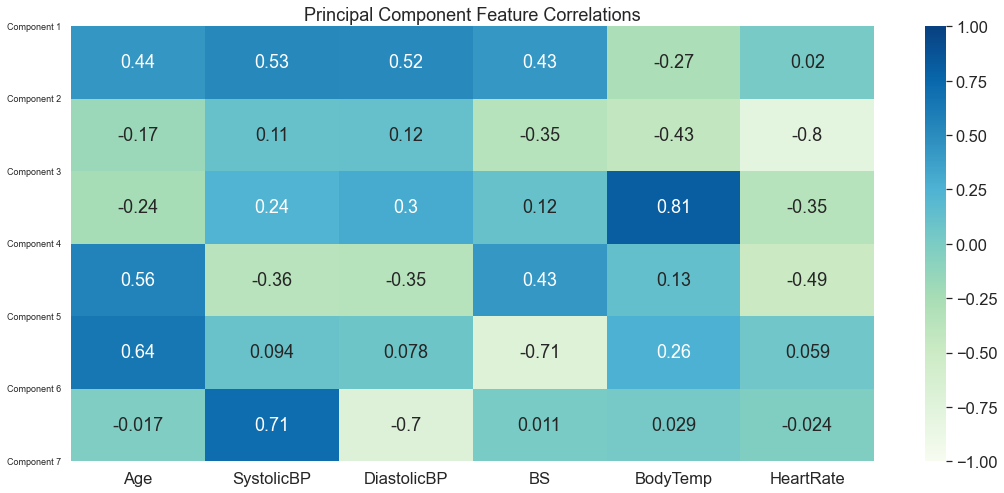

In [59]:
plt.figure(figsize=(18,8))
sns.heatmap(data_pca, vmin=-1, vmax=1, cmap='GnBu', annot=True)
plt.title('Principal Component Feature Correlations')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7'],rotation=0, fontsize=9)
plt.show()

In [60]:
component = "PC1"

idx = X_pca[component].sort_values(ascending=False).index
df.loc[idx, ["Age", "SystolicBP"]]

,Age,SystolicBP
130,40,160
166,40,160
538,40,160
123,40,160
994,40,160
...,...,...
848,15,70
661,15,70
19,10,70
928,16,70


In [61]:
component = "PC2"

idx = X_pca[component].sort_values(ascending=False).index
df.loc[idx, [ 'DiastolicBP', 'BS']]

,DiastolicBP,BS
499,75,7.9
908,75,7.9
783,95,6.8
408,95,6.8
306,95,6.9
...,...,...
458,60,11.0
105,60,11.0
442,60,11.0
679,60,11.0


In [62]:
component = "PC3"

idx = X_pca[component].sort_values(ascending=False).index
df.loc[idx, [ 'BodyTemp', 'HeartRate']]

,BodyTemp,HeartRate
419,103.0,80
499,98.0,7
908,98.0,7
342,103.0,76
414,102.0,68
...,...,...
404,98.0,77
780,98.0,77
99,98.0,77
411,98.0,77


In [63]:
wcss=[]

for i in range(1,10):
    kmeans=KMeans(i, init='k-means++')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
wcss

[6083.999999999999,
 4381.511260273982,
 3354.828576997323,
 2739.14181763191,
 2445.2680343534225,
 2213.8167942184537,
 2005.669372402634,
 1884.3556513590045,
 1721.431530579095]

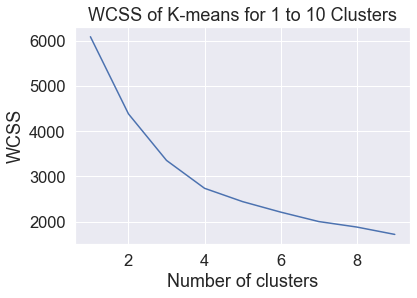

In [64]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title("WCSS of K-means for 1 to 10 Clusters")
plt.show()

In [65]:
kmeans_new=KMeans(3, init='k-means++')
kmeans_new.fit(X_scaled)
clusters_new=X.copy()
clusters_new['cluster_pred']=kmeans_new.fit_predict(X_scaled)

In [66]:
class_compare = pd.concat([clusters_new['cluster_pred'], y], axis=1)

In [67]:
class_compare

,cluster_pred,RiskLevel
0,0,high risk
1,0,high risk
2,1,high risk
3,2,high risk
4,2,low risk
...,...,...
1009,0,high risk
1010,0,high risk
1011,0,high risk
1012,0,high risk


In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

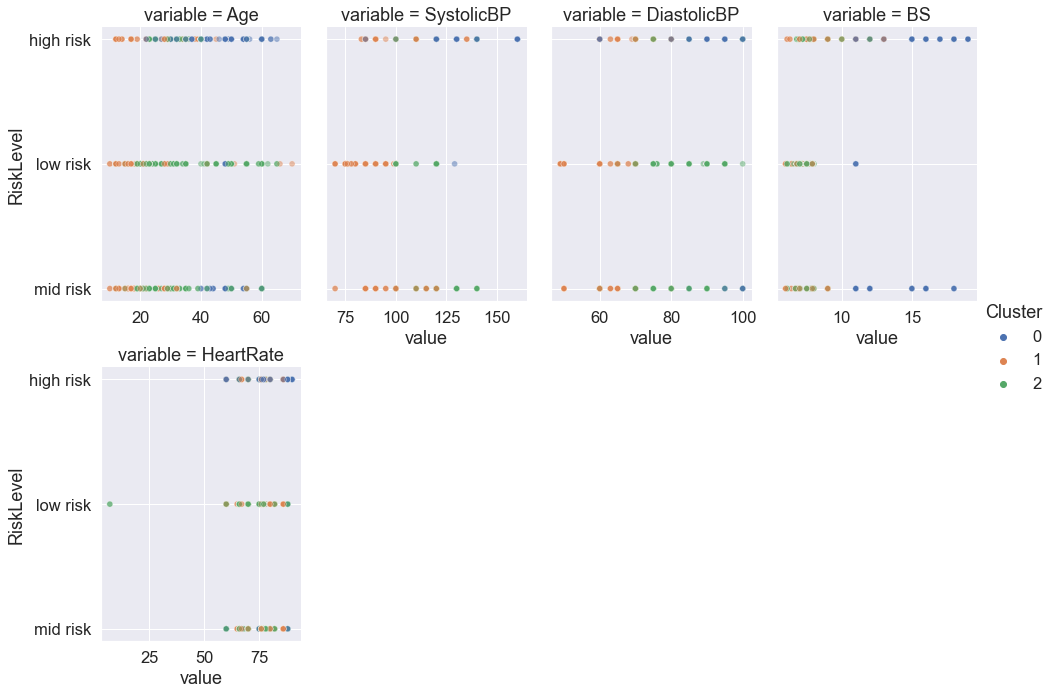

In [70]:
X_clus = X.copy()
X_clus["Cluster"] = class_compare.cluster_pred.astype("category")
X_clus["RiskLevel"] = y
sns.relplot(
    x="value", y="RiskLevel", hue="Cluster", col="variable", alpha=0.5,
    height=5, aspect=0.7, facet_kws={'sharex': False}, col_wrap=4,
    data=X_clus.melt(
        value_vars=features, id_vars=["RiskLevel", "Cluster"],
    ),
);

In [71]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
#lbl.fit_transform(class_compare['cluster_pred'].astype(str))
X['kmeans_cluster'] = lbl.fit_transform(class_compare['cluster_pred'].astype(str)) #model does slightly better WITH this feature

In [72]:
lda = LDA(n_components=2)

In [73]:
X_lda = lda.fit_transform(X, y)

In [74]:
lda.explained_variance_ratio_

array([0.93634248, 0.06365752])

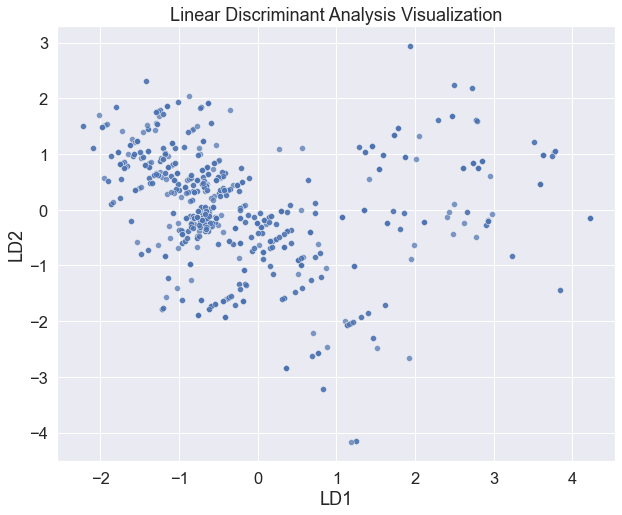

In [75]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1],  cmap='turbo', alpha=0.7, edgecolors='yellow')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Linear Discriminant Analysis Visualization')
plt.show()

In [76]:
X_lda[:,0]

array([ 2.49192631,  2.11693159, -0.10492264, ...,  1.93164776,
        2.71937477,  0.35915782])

In [77]:
X_all = pd.concat([X, pd.DataFrame(X_lda, columns=['LD1', 'LD2'])], axis=1)
X_all.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,kmeans_cluster,LD1,LD2
0,25,130,80,15.0,98.0,86,0,2.491926,0.108648
1,35,140,90,13.0,98.0,70,0,2.116932,-0.219558
2,29,90,70,8.0,100.0,80,1,-0.104923,0.567933
3,30,140,85,7.0,98.0,70,2,-0.228665,-1.420109
4,35,120,60,6.1,98.0,76,2,-1.217167,-1.790117


In [78]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,kmeans_cluster
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,2


In [79]:
X_train, X_test, y_train, y_test  = train_test_split(X_all, y, test_size=0.25, random_state=3)

In [80]:
mm_scaler = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_svm = mm_scaler.transform(X_train)

In [81]:
param_grid = {'C': [1, 2, 5, 10, 20], 'kernel': ('rbf', 'sigmoid')}

svm = SVC(random_state=3, max_iter=-1)

clf = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
clf.fit(X_train_svm, y_train)

print('GridSearch Best Estimator: {}'.format(clf.best_estimator_))
print('GridSearch Best Parameters: {}'.format(clf.best_params_))
print()
print('Support Vector Machine Accuracy: {:.2%}'.format(clf.score(mm_scaler.transform(X_test), y_test)))

GridSearch Best Estimator: SVC(C=10, random_state=3)
GridSearch Best Parameters: {'C': 10, 'kernel': 'rbf'}

Support Vector Machine Accuracy: 70.87%


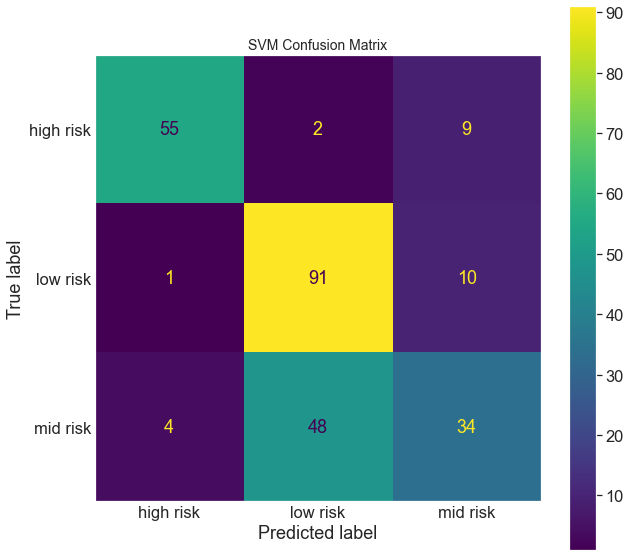

In [82]:
y_pred = clf.predict(mm_scaler.transform(X_test))

cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.title('SVM Confusion Matrix', fontsize=14)
plt.grid(False)
plt.show()

In [83]:
print(classification_report(y_test, y_pred, target_names = ['Normal', 'Suspect', 'Confirmed']))

              precision    recall  f1-score   support

      Normal       0.92      0.83      0.87        66
     Suspect       0.65      0.89      0.75       102
   Confirmed       0.64      0.40      0.49        86

    accuracy                           0.71       254
   macro avg       0.73      0.71      0.70       254
weighted avg       0.71      0.71      0.69       254



In [84]:
# Using the K Nearest Neighbour approach
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
param_grid = {'n_neighbors': [1, 5, 10, 20, 50], 'weights': ['uniform', 'distance'], 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')}

knn = KNeighborsClassifier()

clf = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

print('GridSearch Best Estimator: {}'.format(clf.best_estimator_))
print('GridSearch Best Parameters: {}'.format(clf.best_params_))
print()
print('KNeighbors Classifier Accuracy: {:.2%}'.format(clf.score(X_test, y_test)))

GridSearch Best Estimator: KNeighborsClassifier(algorithm='brute', n_neighbors=50, weights='distance')
GridSearch Best Parameters: {'algorithm': 'brute', 'n_neighbors': 50, 'weights': 'distance'}

KNeighbors Classifier Accuracy: 80.71%


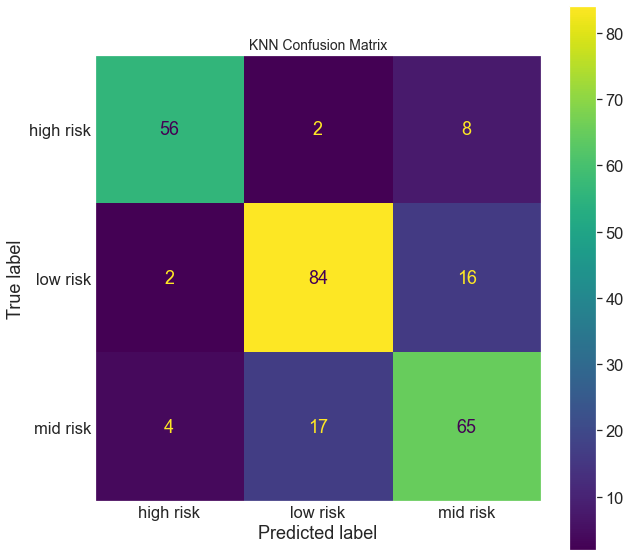

In [86]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.title('KNN Confusion Matrix', fontsize=14)
plt.grid(False)
plt.show()

In [87]:
print(classification_report(y_test, y_pred, target_names = ['Normal', 'Suspect', 'Confirmed']))

              precision    recall  f1-score   support

      Normal       0.90      0.85      0.88        66
     Suspect       0.82      0.82      0.82       102
   Confirmed       0.73      0.76      0.74        86

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254



In [88]:
# Using the Logistic Regression Approach

param_grid = {'penalty': ['l1', 'l2'], 'solver': ('newton-cg', 'lbfgs', 'liblinear'),
              'C': [1, 2, 5, 10, 20]}

logreg = LogisticRegression(max_iter=500, random_state=3, multi_class='multinomial', n_jobs=-1)

clf = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

print('GridSearch Best Estimator: {}'.format(clf.best_estimator_))
print('GridSearch Best Parameters: {}'.format(clf.best_params_))
print()
print('Logistic Regression Accuracy: {:.2%}'.format(clf.score(X_test, y_test)))

GridSearch Best Estimator: LogisticRegression(C=5, max_iter=500, multi_class='multinomial', n_jobs=-1,
                   random_state=3, solver='newton-cg')
GridSearch Best Parameters: {'C': 5, 'penalty': 'l2', 'solver': 'newton-cg'}

Logistic Regression Accuracy: 62.99%


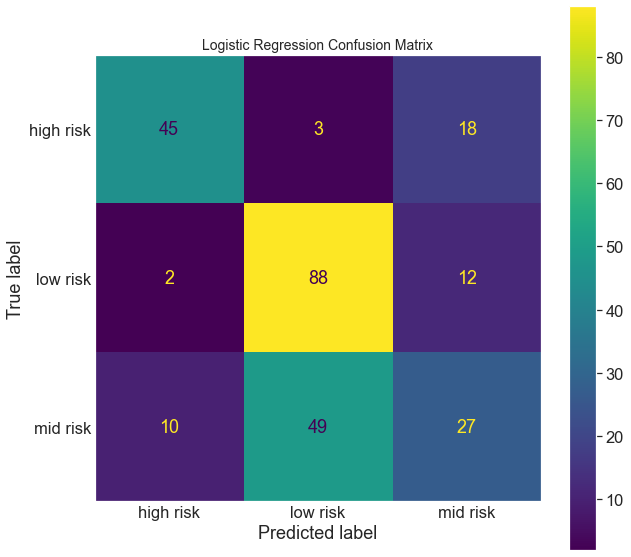

In [89]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Logistic Regression Confusion Matrix', fontsize=14)
plt.grid(False)
plt.show()

In [90]:
print(classification_report(y_test, y_pred, target_names = ['Normal', 'Suspect', 'Confirmed']))

              precision    recall  f1-score   support

      Normal       0.79      0.68      0.73        66
     Suspect       0.63      0.86      0.73       102
   Confirmed       0.47      0.31      0.38        86

    accuracy                           0.63       254
   macro avg       0.63      0.62      0.61       254
weighted avg       0.62      0.63      0.61       254



In [91]:
# Attempting to try a different approach using Stratified KFold with the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000)

skf_scores = []
skf_f1scores = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx] #We want to use scaled values.
    y_train, y_test = y[train_idx], y[test_idx]

    rf.fit(X_train, y_train)
    skf_scores.append(rf.score(X_test, y_test))

    y_pred = rf.predict(X_test)
    #print(classification_report(y_test, y_pred, target_names = ['Normal', 'Suspect', 'Pathological']))

    print('Fold {} F1 Score: {:.2%}'.format(i+1, f1_score(y_test, y_pred, average='micro'))) #micro to peform global f1 score
    skf_f1scores.append(f1_score(y_test, y_pred, average='micro'))

print("List of Accuracies: {}".format(skf_scores))

print()
print("Mean of Accuracies: {:.2%}".format(np.mean(skf_scores)))
print("Mean of F1 Scores: {:.2%}".format(np.mean(skf_f1scores)))

Fold 1 F1 Score: 85.71%
Fold 2 F1 Score: 88.67%
Fold 3 F1 Score: 80.30%
Fold 4 F1 Score: 88.18%
Fold 5 F1 Score: 83.66%
List of Accuracies: [0.8571428571428571, 0.8866995073891626, 0.8029556650246306, 0.8817733990147784, 0.8366336633663366]

Mean of Accuracies: 85.30%
Mean of F1 Scores: 85.30%


In [92]:
param_grid = {'n_estimators': [50, 100, 250, 500, 1000], 'criterion': ('gini', 'entropy'),
              'min_samples_leaf': [1, 2, 5, 10, 20, 50], 'min_samples_split' : [5, 10, 25, 50],
              'max_depth': [1, 3, 5, 7, 10]}